---
### **IMPORT LIBRARIES AND DEPENDANCIES**
---

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz
!gunzip cc.id.300.vec.gz

--2025-06-19 11:07:22--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.173.166.74, 18.173.166.31, 18.173.166.48, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.173.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1227018698 (1.1G) [binary/octet-stream]
Saving to: ‘cc.id.300.vec.gz’

cc.id.300.vec.gz    100%[===================>]   1.14G  39.0MB/s    in 16s     

2025-06-19 11:07:38 (74.3 MB/s) - ‘cc.id.300.vec.gz’ saved [1227018698/1227018698]



In [ ]:
!pip uninstall -y numpy gensim
!pip install numpy==1.25.2  # Compatible with TensorFlow and Gensim
!pip install gensim

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 56.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.2 which is incompatible.
blosc2 3.4.0 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [ ]:
!pip install pandas nltk matplotlib stanza scikit-learn sastrawi fasttext numpy gensim

In [ ]:
# Load FastText embeddings with gensim
import gensim
from gensim.models import KeyedVectors
fasttext_model = KeyedVectors.load_word2vec_format('cc.id.300.vec', binary=False)


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import re
from collections import Counter
import matplotlib.pyplot as plt
import stanza
import pandas as pd
from nltk.corpus import stopwords
from sklearn.metrics import precision_score, recall_score, f1_score
from nltk.corpus import wordnet as wn, stopwords
import ast
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


---
### **LOAD DATA**
---

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/thesis_implementation_code/data_train_dl.csv")
df = df[['story_id', 'person', 'aliases', 'subject_sentences', "is_dialogue", "is_subject", "count_lexicon", 'label']]
df

,story_id,person,aliases,subject_sentences,is_dialogue,is_subject,count_lexicon,label
0,28,Tokoh-11,['ambun'],Ambun kembali bertanya.,0,1,1,protagonist
1,16,Tokoh-4,"['kepala', 'kepala tador', 'tador']",Tador tidak menyangka kalau dia ditinggal di r...,0,1,2,protagonist
2,16,Tokoh-1,"['ibu tador', 'ibunya', 'ibumu', 'ibu']","Akan tetapi, kalau mengharapkan bantuan sang i...",0,0,1,antagonist
3,10,Tokoh-5,['raja margolang'],Raja Margolang menyetujui saran tersebut.,0,0,1,others
4,10,Tokoh-11,['sipakpak kunal'],"Namanya Sipakpak Kunal.""",1,0,0,antagonist
...,...,...,...,...,...,...,...,...
1845,13,Tokoh-9,"['orang anak', 'orang']",Berapa orang yang kau kehendaki membawa tapak ...,0,1,1,others
1846,25,Tokoh-1,"['ibunya', 'ibu']","Sementara itu, sang ibu yang tidak tahan lagi ...",0,1,2,protagonist
1847,13,Tokoh-8,"['datu', 'datu kandibata', 'kandibata']",Datu Kandibata dan isterinya terus menghemoask...,0,1,1,antagonist
1848,109,Tokoh-10,['orang'],Rumah mereka seperti kebanyakan rumah orang la...,0,0,0,others


In [ ]:
import nltk
nltk.download('punkt_tab')

story_df = pd.read_csv("/content/drive/MyDrive/Thesis/Final Project/main/data/Data Cerita Rakyat - raw (1).csv" )
story_df = story_df[['no', 'judul', 'text']]
story_df = story_df.rename(columns={'no': 'story_id'})
story_df['sentences'] = story_df['text'].apply(sent_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
train_df = df.copy()

In [ ]:
train_df['label'].value_counts()

,count
label,
others,717
protagonist,650
antagonist,483


In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/thesis_implementation_code/data_test_dl.csv")
test_df = test_df[['story_id', 'person', 'aliases', 'subject_sentences', "is_dialogue", "is_subject", "count_lexicon", 'label']]
test_df

,story_id,person,aliases,subject_sentences,is_dialogue,is_subject,count_lexicon,label
0,28,Tokoh-6,"['nak', 'orang anak', 'orang', 'orang kakak']",Banyak orang di kampung itu mengira mereka sau...,0,1,2,others
1,13,Tokoh-9,"['orang anak', 'orang']",Berapa orang pesuruh yang ku kehendaki akan ku...,0,1,0,others
2,111,Tokoh-4,"['anaknya', 'anakku', 'anak']",Kemudian anak raja ini menyerahkan uang kepada...,0,1,1,protagonist
3,105,Tokoh-18,['banta ahmad'],Lalu Banta Ahmad dibawa pulang untuk diobati.,0,0,0,protagonist
4,109,Tokoh-2,"['ayah siti sara', 'ayahnya', 'ayahmu']","""Pesan ibu padamu, anakku, agar nanti engkau m...",1,0,-2,protagonist
...,...,...,...,...,...,...,...,...
458,57,Tokoh-3,['kepala'],Petani segera menuju ke rumah Kepala Desa untu...,0,0,0,others
459,23,Tokoh-4,"['anak gadis', 'anaknya', 'anak']","Dia tinggal berdua dengan Siti, anak gadisnya ...",0,0,2,antagonist
460,79,Tokoh-8,['chandrakirana'],Ia ingat tugas Chandrakirana yang tiap hari me...,0,0,2,protagonist
461,15,Tokoh-9,['sri pandan'],"Di tengah perjalanan menuju lubuk, Sri Pandan ...",0,0,0,protagonist


---
### **FEATURE ENGINEERING**
---

#### **PREPROCESS TEXT FEATURE**
---

In [ ]:
from difflib import get_close_matches

def get_sentences_with_context(row, story_df):
    story_id = row['story_id']
    sentence = row['subject_sentences']

    try:
        story_sentences = story_df[story_df['story_id'] == story_id]['sentences'].iloc[0]

        # Find closest match
        match = get_close_matches(sentence, story_sentences, n=1, cutoff=0.8)
        if match:
            match_index = story_sentences.index(match[0])

            prev_sentence = story_sentences[match_index - 1] if match_index > 0 else ""
            next_sentence = story_sentences[match_index + 1] if match_index < len(story_sentences) - 1 else ""

            return f"{prev_sentence} {match[0]} {next_sentence}".strip()
        else:
            return sentence
    except Exception as e:
        print(f"Error: {e}")
        return sentence



# Assuming 'story_df' is already loaded and processed as in the original code.
train_df['subject_sentences'] = train_df.apply(lambda row: get_sentences_with_context(row, story_df), axis=1)
train_df


,story_id,person,aliases,subject_sentences,is_dialogue,is_subject,count_lexicon,label
0,28,Tokoh-11,['ambun'],"Apakah ibu mengizinkan kami pergi?"" Ambun kemb...",0,1,1,protagonist
1,16,Tokoh-4,"['kepala', 'kepala tador', 'tador']",Tador kecewa. Tador tidak menyangka kalau dia ...,0,1,2,protagonist
2,16,Tokoh-1,"['ibu tador', 'ibunya', 'ibumu', 'ibu']",Ayah tidak akan sanggup bekerja sendirian. Aka...,0,0,1,antagonist
3,10,Tokoh-5,['raja margolang'],Mereka khawatir cinta calon mempelai laki-laki...,0,0,1,others
4,10,Tokoh-11,['sipakpak kunal'],"""Budak ini, Mertuaku, lebih banyak pengalamann...",1,0,0,antagonist
...,...,...,...,...,...,...,...,...
1845,13,Tokoh-9,"['orang anak', 'orang']",Berapa orang pesuruh yang ku kehendaki akan ku...,0,1,1,others
1846,25,Tokoh-1,"['ibunya', 'ibu']","Meskipun niat jeleknya telah diketahui, Doyan ...",0,1,2,protagonist
1847,13,Tokoh-8,"['datu', 'datu kandibata', 'kandibata']","Dicari tulang-tulang sebesar tulang sisir pun,...",0,1,1,antagonist
1848,109,Tokoh-10,['orang'],Di pinggir sebuah kampung terdapat sebuah kelu...,0,0,0,others


In [ ]:
def preprocess_text(sentence):
    # Lowercasing
    sentence = sentence.lower()

    # Remove non-alphabetical characters (keep spaces)
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    return sentence

train_df['subject_sentences'] = train_df['subject_sentences'].apply(preprocess_text)

test_df['subject_sentences'] = test_df['subject_sentences'].apply(preprocess_text)
train_df

,story_id,person,aliases,subject_sentences,is_dialogue,is_subject,count_lexicon,label
0,28,Tokoh-11,['ambun'],apakah ibu mengizinkan kami pergi ambun kembal...,0,1,1,protagonist
1,16,Tokoh-4,"['kepala', 'kepala tador', 'tador']",tador kecewa tador tidak menyangka kalau dia d...,0,1,2,protagonist
2,16,Tokoh-1,"['ibu tador', 'ibunya', 'ibumu', 'ibu']",ayah tidak akan sanggup bekerja sendirian akan...,0,0,1,antagonist
3,10,Tokoh-5,['raja margolang'],mereka khawatir cinta calon mempelai lakilaki ...,0,0,1,others
4,10,Tokoh-11,['sipakpak kunal'],budak ini mertuaku lebih banyak pengalamannya ...,1,0,0,antagonist
...,...,...,...,...,...,...,...,...
1845,13,Tokoh-9,"['orang anak', 'orang']",berapa orang pesuruh yang ku kehendaki akan ku...,0,1,1,others
1846,25,Tokoh-1,"['ibunya', 'ibu']",meskipun niat jeleknya telah diketahui doyan n...,0,1,2,protagonist
1847,13,Tokoh-8,"['datu', 'datu kandibata', 'kandibata']",dicari tulangtulang sebesar tulang sisir pun j...,0,1,1,antagonist
1848,109,Tokoh-10,['orang'],di pinggir sebuah kampung terdapat sebuah kelu...,0,0,0,others


In [ ]:
import numpy as np

lengths = train_df['subject_sentences'].apply(lambda x: len(x.split()))
maxlen = int(np.percentile(lengths, 95))  # 95th percentile of token counts
print("Recommended maxlen:", maxlen)


Recommended maxlen: 56


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

texts = train_df['subject_sentences'].tolist()

# Tokenizer setup
MAX_NUM_WORDS = 10000
MAX_LEN = maxlen
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding
X_text = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')
train_df['f4_encoded'] = [list(seq) for seq in X_text]



In [ ]:
texts_test = test_df['subject_sentences'].tolist()
sequences_test = tokenizer.texts_to_sequences(texts_test)

X_text_test = pad_sequences(sequences_test, maxlen=MAX_LEN, padding='post', truncating='post')

test_df['f4_encoded'] = [list(seq) for seq in X_text_test]



In [ ]:
EMBEDDING_DIM = 300  # Make sure this matches the FastText file, e.g. cc.id.300.vec

# Create embedding matrix
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    try:
        embedding_vector = fasttext_model[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        pass  # FastText can usually generate vectors for OOV words, but just in case


#### **PREPROCESS NUMERIC FEATURE**
---

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Select the column and reshape to 2D
values = train_df[['is_dialogue']]  # double brackets to keep it as a DataFrame (2D)

# Step 2: Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values)

# Step 3: Replace or add back to the DataFrame
train_df['is_dialogue_scaled'] = scaled_values


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Select the column and reshape to 2D
values = test_df[['is_dialogue']]  # double brackets to keep it as a DataFrame (2D)

# Step 2: Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values)

# Step 3: Replace or add back to the DataFrame

test_df['is_dialogue_scaled'] = scaled_values


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Select the column and reshape to 2D
values = train_df[['is_subject']]  # double brackets to keep it as a DataFrame (2D)

# Step 2: Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values)

# Step 3: Replace or add back to the DataFrame
train_df['is_subject_scaled'] = scaled_values


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Select the column and reshape to 2D
values = test_df[['is_subject']]  # double brackets to keep it as a DataFrame (2D)

# Step 2: Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values)

# Step 3: Replace or add back to the DataFrame

test_df['is_subject_scaled'] = scaled_values


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Select the column and reshape to 2D
values = train_df[['count_lexicon']]  # double brackets to keep it as a DataFrame (2D)

# Step 2: Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values)

# Step 3: Replace or add ack to the DataFrame
train_df['count_lexicon_scaled'] = scaled_values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Select the column and reshape to 2D
values = test_df[['count_lexicon']]  # double brackets to keep it as a DataFrame (2D)

# Step 2: Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values)

# Step 3: Replace or add ack to the DataFrame

test_df['count_lexicon_scaled'] = scaled_values

In [ ]:
train_df

,story_id,person,aliases,subject_sentences,is_dialogue,is_subject,count_lexicon,label,f4_encoded,is_dialogue_scaled,is_subject_scaled,count_lexicon_scaled
0,28,Tokoh-11,['ambun'],apakah ibu mengizinkan kami pergi ambun kembal...,0,1,1,protagonist,"[290, 15, 689, 108, 53, 140, 49, 173, 285, 15,...",0.0,1.0,0.368421
1,16,Tokoh-4,"['kepala', 'kepala tador', 'tador']",tador kecewa tador tidak menyangka kalau dia d...,0,1,2,protagonist,"[13, 867, 13, 7, 752, 114, 26, 421, 5, 31, 13,...",0.0,1.0,0.421053
2,16,Tokoh-1,"['ibu tador', 'ibunya', 'ibumu', 'ibu']",ayah tidak akan sanggup bekerja sendirian akan...,0,0,1,antagonist,"[20, 7, 18, 370, 242, 286, 18, 59, 114, 1163, ...",0.0,0.0,0.368421
3,10,Tokoh-5,['raja margolang'],mereka khawatir cinta calon mempelai lakilaki ...,0,0,1,others,"[9, 753, 868, 613, 2751, 256, 2, 94, 2752, 18,...",0.0,0.0,0.368421
4,10,Tokoh-11,['sipakpak kunal'],budak ini mertuaku lebih banyak pengalamannya ...,1,0,0,antagonist,"[159, 17, 1045, 82, 116, 2056, 4, 82, 1046, 53...",1.0,0.0,0.315789
...,...,...,...,...,...,...,...,...,...,...,...,...
1845,13,Tokoh-9,"['orang anak', 'orang']",berapa orang pesuruh yang ku kehendaki akan ku...,0,1,1,others,"[539, 19, 1043, 2, 2692, 1768, 18, 1770, 539, ...",0.0,1.0,0.368421
1846,25,Tokoh-1,"['ibunya', 'ibu']",meskipun niat jeleknya telah diketahui doyan n...,0,1,2,protagonist,"[206, 725, 1814, 23, 604, 129, 111, 44, 20, 15...",0.0,1.0,0.421053
1847,13,Tokoh-8,"['datu', 'datu kandibata', 'kandibata']",dicari tulangtulang sebesar tulang sisir pun j...,0,1,1,antagonist,"[4600, 2596, 948, 1259, 2749, 14, 2043, 172, 4...",0.0,1.0,0.368421
1848,109,Tokoh-10,['orang'],di pinggir sebuah kampung terdapat sebuah kelu...,0,0,0,others,"[5, 1271, 90, 85, 838, 90, 259, 2, 143, 43, 33...",0.0,0.0,0.315789


In [ ]:
numeric_features = ['is_dialogue_scaled', 'is_subject_scaled', 'count_lexicon_scaled']
X_numeric = train_df[numeric_features].values


#### **LABEL ENCODING**
---

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assume your labels are in df['label']
le = LabelEncoder()
train_df['label_encoded'] = le.fit_transform(train_df['label'])

# Optional: check mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'antagonist': 0, 'others': 1, 'protagonist': 2}


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assume your labels are in df['label']
le = LabelEncoder()
test_df['label_encoded'] = le.fit_transform(test_df['label'])

# Optional: check mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'antagonist': 0, 'others': 1, 'protagonist': 2}


---
### **DATA SPLITTING**
---

In [ ]:
import numpy as np

# Create the group_key for reference
train_df['group_key'] = train_df['story_id'].astype(str) + '_' + train_df['person'].astype(str)

# Extract features and labels without splitting
X_text_train = np.array(train_df['f4_encoded'].tolist())
X_num_train = train_df[['is_dialogue_scaled', 'is_subject_scaled', 'count_lexicon_scaled']].to_numpy()
y_train = train_df['label_encoded'].to_numpy()
group_keys_train = train_df['group_key'].to_numpy()


In [ ]:
import numpy as np

# Create the group_key for reference
test_df['group_key'] = test_df['story_id'].astype(str) + '_' + test_df['person'].astype(str)

# Extract test inputs
X_text_test = np.array(test_df['f4_encoded'].tolist())
X_num_test = test_df[['is_dialogue_scaled', 'is_subject_scaled', 'count_lexicon_scaled']].to_numpy()
y_test = test_df['label_encoded'].to_numpy()
group_keys_test = test_df['group_key'].to_numpy()



In [ ]:
X_num_test

X_num_test_3 = [[row[0], row[1]] for row in X_num_test]
X_num_test_2 = [[row[1]] for row in X_num_test]

In [ ]:
X_num_test_3 = np.array(X_num_test_3)
X_num_test_2 = np.array(X_num_test_2)

In [ ]:
X_num_train

X_num_train_3 = [[row[0], row[1]] for row in X_num_train]
X_num_train_2 = [[row[1]] for row in X_num_train]

In [ ]:
X_num_train_3 = np.array(X_num_train_3)
X_num_train_2 = np.array(X_num_train_2)

---
### **ATTENTION LAYER**
---

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense
from tensorflow.keras import backend as K

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], 1),
                                 initializer='glorot_uniform',
                                 trainable=True,
                                 name='attention_weights')
        self.b = self.add_weight(shape=(1,),
                                 initializer='zeros',
                                 trainable=True,
                                 name='attention_bias')
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        # inputs shape: (batch_size, time_steps, input_dim)
        e = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)  # (batch_size, time_steps, 1)
        alpha = tf.nn.softmax(e, axis=1)  # (batch_size, time_steps, 1)
        context = inputs * alpha  # (batch_size, time_steps, input_dim)
        context_vector = tf.reduce_sum(context, axis=1)  # (batch_size, input_dim)
        return context_vector


---
### **EVALUATION**
---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def evaluate_grouped(model_fitted, X_text_test, X_num_test, group_keys_test, y_test):
    # Predict probabilities
    y_pred_prob = model_fitted.predict({"text_input": X_text_test, "numeric_input": X_num_test})
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Build base DataFrame
    df_test = pd.DataFrame({
        'group_key': group_keys_test,
        'y_true': y_test,
        'y_pred': y_pred
    })

    # Add prediction probabilities as separate columns
    prob_cols = [f'prob_{i}' for i in range(y_pred_prob.shape[1])]
    df_probs = pd.DataFrame(y_pred_prob, columns=prob_cols)
    df_test = pd.concat([df_test, df_probs], axis=1)

    # Group and aggregate
    grouped = df_test.groupby('group_key').agg({
        'y_true': lambda x: Counter(x).most_common(1)[0][0],  # still using majority for true label
        **{col: 'mean' for col in prob_cols}
    }).reset_index()

    # Get predicted label based on highest average probability
    grouped['y_pred'] = grouped[prob_cols].values.argmax(axis=1)

    # Evaluate
    print(classification_report(grouped['y_true'], grouped['y_pred'], digits=4))

    precision = precision_score(grouped['y_true'], grouped['y_pred'], average='macro')
    recall = recall_score(grouped['y_true'], grouped['y_pred'], average='macro')
    f1 = f1_score(grouped['y_true'], grouped['y_pred'], average='macro')
    accuracy = accuracy_score(grouped['y_true'], grouped['y_pred'])

    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print(f"Accuracy:  {accuracy:.4f}")

    cm = confusion_matrix(grouped['y_true'], grouped['y_pred'])
    print("Confusion Matrix:\n", cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')



In [ ]:
import pandas as pd
from collections import Counter
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

def evaluate_single(model_fitted, X_text_test, group_keys_test, y_test):
  # 1. Predict
  # Predict class probabilities
  y_pred_prob = model_fitted.predict(X_text_test)

  # Get predicted class (index of max prob)
  y_pred = np.argmax(y_pred_prob, axis=1)

  # 2. Create a DataFrame to hold predictions, true labels, and group keys
  df_test = pd.DataFrame({
      'group_key': group_keys_test,
      'y_true': y_test,
      'y_pred': y_pred
  })

  # 3. Define a helper function to get the most common label (majority vote)
  def most_common_label(labels):
      return Counter(labels).most_common(1)[0][0]

  # 4. Group by group_key and get majority vote of predictions and true labels
  grouped = df_test.groupby('group_key').agg({
      'y_pred': lambda x: most_common_label(list(x)),
      'y_true': lambda x: most_common_label(list(x))
  }).reset_index()

  # 5. Compute metrics on grouped labels
  print(classification_report(grouped['y_true'], grouped['y_pred'], digits=4))

  precision = precision_score(grouped['y_true'], grouped['y_pred'], average='macro')
  recall = recall_score(grouped['y_true'], grouped['y_pred'], average='macro')
  f1 = f1_score(grouped['y_true'], grouped['y_pred'], average='macro')
  accuracy = accuracy_score(grouped['y_true'], grouped['y_pred'])

  print(f"Precision: {precision:.4f}")
  print(f"Recall:    {recall:.4f}")
  print(f"F1-score:  {f1:.4f}")
  print(f"Accuracy:  {accuracy:.4f}")


---
## **SCENARIO FRONT**
---

In [ ]:
len(y_train)

1850

---
### **LSTM (4 FEATURE)**
---

In [ ]:
from tensorflow.keras.layers import Concatenate, Input, Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight


# Jumlah fitur numerik kamu
# Jumlah fitur numerik kamu
NUM_NUMERIC_FEATURES = train_df[['is_dialogue_scaled', 'is_subject_scaled', 'count_lexicon_scaled']].shape[1]

# --- TEXT INPUT BRANCH ---
text_input = Input(shape=(MAX_LEN,), name="text_input")
x_text = Embedding(
    input_dim=num_words,
    output_dim=EMBEDDING_DIM,
    weights=[embedding_matrix],
    input_length=MAX_LEN,
    trainable=True
)(text_input)

x_text = LSTM(
    64,                      # lebih besar kapasitas
    return_sequences=True,
    dropout=0.4,             # sedikit diturunkan
    recurrent_dropout=0.4,
)(x_text)

x_text = AttentionLayer()(x_text)

# --- NUMERIC INPUT BRANCH ---
numeric_input = Input(shape=(NUM_NUMERIC_FEATURES,), name="numeric_input")

# Optional: normalization/dense layer
x_numeric = BatchNormalization()(numeric_input)

# --- CONCATENATE BOTH ---
x = Concatenate()([x_text, x_numeric])

# Fully connected layers
x = Dropout(0.4)(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.005))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Output
output = Dense(3, activation='softmax')(x)

# Build model
model_lstm = Model(inputs=[text_input, numeric_input], outputs=output)
model_lstm.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_lstm.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

history = model_lstm.fit(
    {"text_input": X_text_train, "numeric_input": X_num_train},
    y_train,
    validation_split=0.1,
    shuffle=True,
    epochs=50,
    batch_size=16,
    callbacks=[early_stopping],
    class_weight=class_weights_dict
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 56)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 56, 300)   │  1,380,600 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 56, 64)    │     93,440 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, 64)        │         65 │ lstm[0][0]        │
│ (AttentionLayer)    │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 3)         │         12 │ numeric_input[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 67)        │          0 │ attention_layer[… │
│ (Concatenate)       │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 67)        │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      4,352 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 3)         │        195 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,478,920 (5.64 MB)

 Trainable params: 1,478,786 (5.64 MB)

 Non-trainable params: 134 (536.00 B)

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 23s 154ms/step - accuracy: 0.3313 - loss: 1.7057 - val_accuracy: 0.2865 - val_loss: 1.4134
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - accuracy: 0.3367 - loss: 1.5928 - val_accuracy: 0.3459 - val_loss: 1.3969
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 25s 182ms/step - accuracy: 0.3834 - loss: 1.4970 - val_accuracy: 0.3730 - val_loss: 1.3731
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 15s 142ms/step - accuracy: 0.3554 - loss: 1.5296 - val_accuracy: 0.3892 - val_loss: 1.3451
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step - accuracy: 0.3621 - loss: 1.4884 - val_accuracy: 0.4378 - val_loss: 1.3176
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.4234 - loss: 1.3981 - val_accuracy: 0.4703 - val_loss: 1.2892
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 15s 142ms/step - accuracy: 0.4316 - loss: 1.3968 - val_accuracy: 0.4865 - val_loss: 1.2628
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.4760 - loss: 1

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
              precision    recall  f1-score   support

           0     1.0000    0.1333    0.2353        30
           1     0.9412    0.3810    0.5424        84
           2     0.3613    1.0000    0.5309        43

    accuracy                         0.5032       157
   macro avg     0.7675    0.5048    0.4362       157
weighted avg     0.7936    0.5032    0.4805       157

Precision: 0.7675
Recall:    0.5048
F1-score:  0.4362
Accuracy:  0.5032
Confusion Matrix:
 [[ 4  2 24]
 [ 0 32 52]
 [ 0  0 43]]


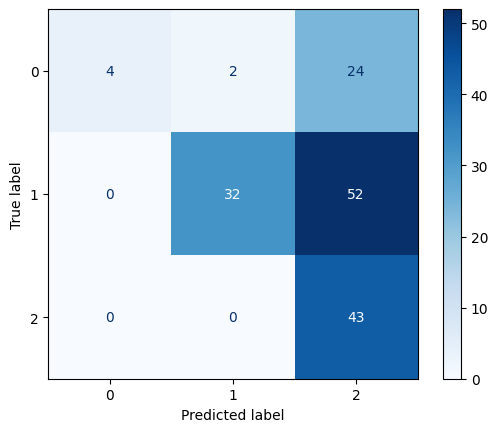

In [ ]:
evaluate_grouped(model_lstm, X_text_test, X_num_test, group_keys_test, y_test)

In [ ]:
# model_lstm.save("/content/drive/MyDrive/Thesis/Final Project/main/model_scenario_2/model_lstm.h5")

---
### **BI-LSTM (4 FEATURES)**
---

In [ ]:
from tensorflow.keras.layers import Concatenate, Input, Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight


# Jumlah fitur numerik kamu
NUM_NUMERIC_FEATURES = train_df[['is_dialogue_scaled', 'is_subject_scaled', 'count_lexicon_scaled']].shape[1]

# --- TEXT INPUT BRANCH ---
text_input = Input(shape=(MAX_LEN,), name="text_input")
x_text = Embedding(
    input_dim=num_words,
    output_dim=EMBEDDING_DIM,
    weights=[embedding_matrix],
    input_length=MAX_LEN,
    trainable=True
)(text_input)

x_text = Bidirectional(LSTM(
    128,
    return_sequences=True,
    dropout=0.4,
    recurrent_dropout=0.4,
))(x_text)
x_text = AttentionLayer()(x_text)

# --- NUMERIC INPUT BRANCH ---
numeric_input = Input(shape=(NUM_NUMERIC_FEATURES,), name="numeric_input")

# Optional: normalization/dense layer
x_numeric = BatchNormalization()(numeric_input)

# --- CONCATENATE BOTH ---
x = Concatenate()([x_text, x_numeric])

# Fully connected layers
x = Dropout(0.4)(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Output
output = Dense(3, activation='softmax')(x)

# Build model
model_bilstm = Model(inputs=[text_input, numeric_input], outputs=output)
model_bilstm.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_bilstm.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))


history_bilstm = model_bilstm.fit(
    {"text_input": X_text_train, "numeric_input": X_num_train},
    y_train,
    validation_split=0.1,
    shuffle=True,  # penting
    epochs=100,
    batch_size=16,
    callbacks = [early_stopping],
    class_weight=class_weights_dict
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 56)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 56, 300)   │  1,380,600 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 56, 256)   │    439,296 │ embedding_1[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer_1   │ (None, 256)       │        257 │ bidirectional[0]… │
│ (AttentionLayer)    │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 3)         │         12 │ numeric_input[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 259)       │          0 │ attention_layer_… │
│ (Concatenate)       │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 259)       │          0 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │     16,640 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 3)         │        195 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,837,256 (7.01 MB)

 Trainable params: 1,837,122 (7.01 MB)

 Non-trainable params: 134 (536.00 B)

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 63s 464ms/step - accuracy: 0.3359 - loss: 1.6379 - val_accuracy: 0.3568 - val_loss: 1.1980
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 77s 419ms/step - accuracy: 0.3639 - loss: 1.4860 - val_accuracy: 0.3946 - val_loss: 1.1980
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 45s 432ms/step - accuracy: 0.3819 - loss: 1.3866 - val_accuracy: 0.4324 - val_loss: 1.1896
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 58s 547ms/step - accuracy: 0.3905 - loss: 1.3814 - val_accuracy: 0.4216 - val_loss: 1.1816
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 73s 465ms/step - accuracy: 0.3720 - loss: 1.3340 - val_accuracy: 0.4324 - val_loss: 1.1748
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 77s 422ms/step - accuracy: 0.4118 - loss: 1.3005 - val_accuracy: 0.4216 - val_loss: 1.1452
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 86s 461ms/step - accuracy: 0.4415 - loss: 1.2417 - val_accuracy: 0.4324 - val_loss: 1.1331
Epoch 8/100


In [ ]:
evaluate_grouped(model_bilstm, X_text_test, X_num_test, group_keys_test, y_test)

In [ ]:
-# model_bilstm.save("/content/drive/MyDrive/Thesis/Final Project/main/model_scenario_2/model_bilstm.h5")

---
### **GRU (3 FEATURES)**
---

In [ ]:
from tensorflow.keras.layers import Concatenate, Input, Embedding, LSTM, Dense, Dropout, BatchNormalization, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

NUM_NUMERIC_FEATURES = train_df[['is_subject_scaled','is_dialogue_scaled']].shape[1]


# --- TEXT INPUT BRANCH ---
text_input = Input(shape=(MAX_LEN,), name="text_input")
x_text = Embedding(
    input_dim=num_words,
    output_dim=EMBEDDING_DIM,
    weights=[embedding_matrix],
    input_length=MAX_LEN,
    trainable=True
)(text_input)

x_text = GRU(
    64,
    return_sequences=True,
    dropout=0.4,
    recurrent_dropout=0.4,
)(x_text)
x_text = AttentionLayer()(x_text)

# --- NUMERIC INPUT BRANCH ---
numeric_input = Input(shape=(NUM_NUMERIC_FEATURES,), name="numeric_input")

# Optional: normalization/dense layer
x_numeric = BatchNormalization()(numeric_input)

# --- CONCATENATE BOTH ---
x = Concatenate()([x_text, x_numeric])

# Fully connected layers
x = Dropout(0.4)(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.005))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Output
output = Dense(3, activation='softmax')(x)

# Build model
model_gru_3 = Model(inputs=[text_input, numeric_input], outputs=output)
model_gru_3.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_gru_3.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))


history_gru = model_gru_3.fit(
    {"text_input": X_text_train, "numeric_input": X_num_train_3},
    y_train,
    validation_split=0.1,
    shuffle=True,  # penting
    epochs=150,
    batch_size=32,
    callbacks = [early_stopping],
    class_weight=class_weights_dict
)

In [ ]:
evaluate_grouped(model_gru_3, X_text_test, X_num_test_3, group_keys_test, y_test)